In [110]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [111]:
# Useful variables
random_state=42
url="income.csv"
separator=","
target="Rings"
col_names=['Index', 'Sex', 'Length', 'Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [112]:
# 1. 
# We load the data file showing size and data descriptions
df=pd.read_csv(url, sep=separator, header=None, names=col_names, index_col=['Index'])
print(f"Data size is {df.shape}\n")
print(f"Description:\n{df.describe()}")

Data size is (4177, 9)

Description:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  3997.000000  3976.000000  3987.000000   3990.000000     3983.000000   
mean      0.525330     0.408448     0.139669      0.830577        0.360681   
std       0.119569     0.098728     0.041988      0.490629        0.221100   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.444500        0.188000   
50%       0.545000     0.425000     0.140000      0.802250        0.339000   
75%       0.615000     0.480000     0.165000      1.154375        0.503250   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4002.000000   3990.000000  4177.000000  
mean         0.180995      0.239796     0.861623  
std          0.109425      0.139765     0.762510  
min          0.000500      0.001500     0.000000  
25%  

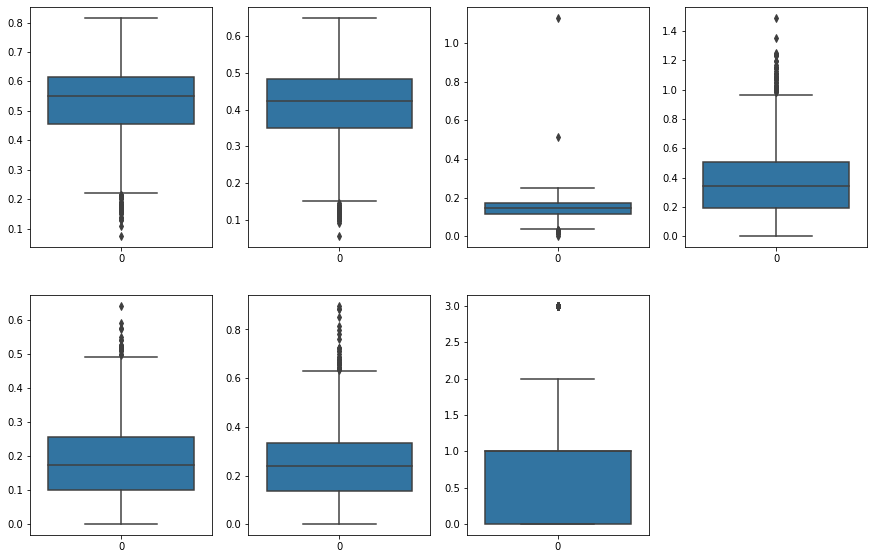

In [130]:
# Boxplot (only for numerical columns)
df_for_boxplot = df.drop(['Sex'], axis=1)
plt.figure(figsize=(15,15))
pos = 1
for i in df_for_boxplot.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(data=df[i])
    pos += 1

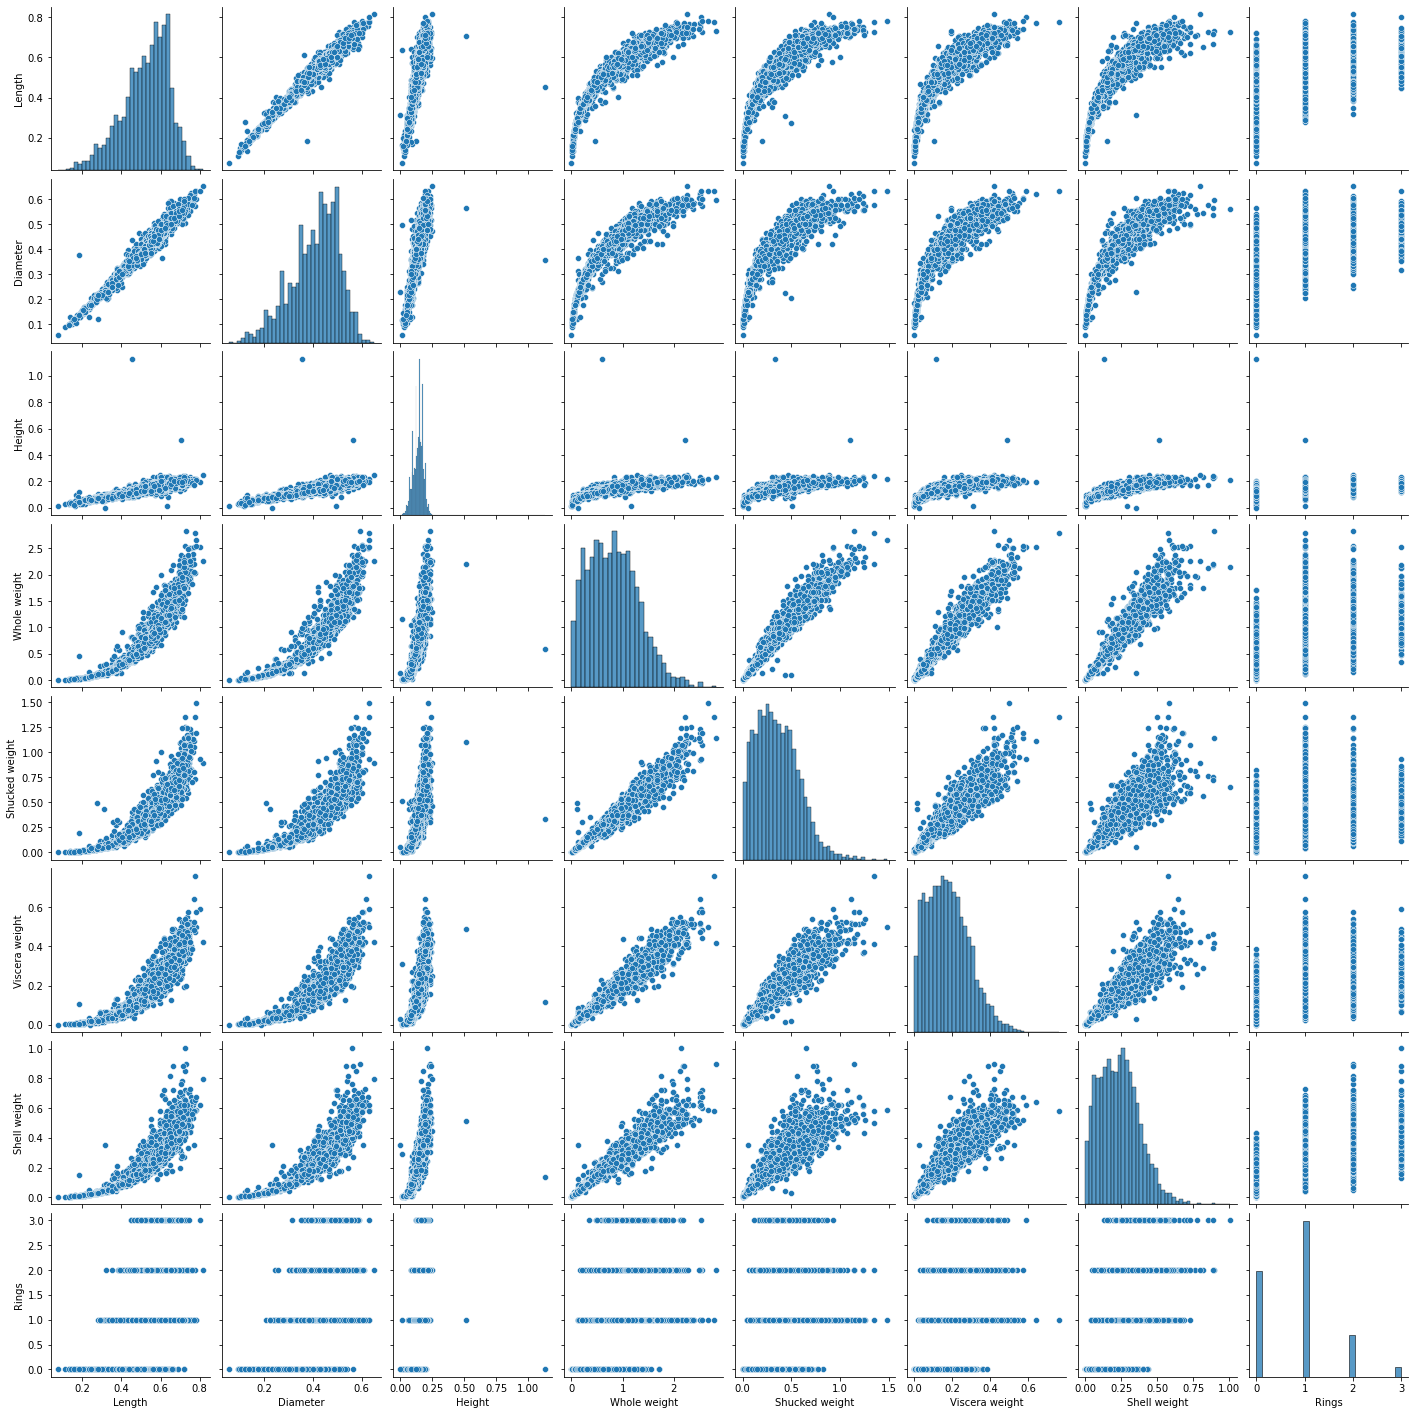

In [114]:
# Pairplot 
sns.pairplot(df)

In [115]:
# 2.
# We can see that there are some distributions that are very similar and higly correlated (such as Length/Diameter
# or the different weights) and there is also a significant presence of outliers.
# All the weight attributes are skewed on the left and have a long tail.
# Also, our data contains some missing values.
# All this things can compromise our analysis so it's time to pre-process.

In [116]:
# 3.
# We have to drop the columns that are not relevant for the classification operation,
# to do this we see if there are columns that are redundant (absolute value higher than 0.95)

correlation_matrix=df.corr()
correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986653,0.820096,0.925313,0.897523,0.902968,0.896765,0.516424
Diameter,0.986653,1.000000,0.825809,0.925261,0.892028,0.899997,0.904190,0.536257
Height,0.820096,0.825809,1.000000,0.812923,0.767946,0.793292,0.810813,0.521217
Whole weight,0.925313,0.925261,0.812923,1.000000,0.968633,0.966005,0.954911,0.518912
Shucked weight,0.897523,0.892028,0.767946,0.968633,1.000000,0.929908,0.880450,0.407858
Viscera weight,0.902968,0.899997,0.793292,0.966005,0.929908,1.000000,0.908641,0.496103
Shell weight,0.896765,0.904190,0.810813,0.954911,0.880450,0.908641,1.000000,0.597953
Rings,0.516424,0.536257,0.521217,0.518912,0.407858,0.496103,0.597953,1.000000


In [117]:
# We can see that the column Whole weight is highly redundant, because has >0.95 value with all the three
# partial weights, so we can remove it
df=df.drop(['Whole weight'], axis=1)

In [118]:
# Now we remove the elements that contains missing values
df=df.dropna()

In [119]:
# 4.
# In order to do a classification, our Sex column has to become numerical
oe = OrdinalEncoder()
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))

# We prepare our data for the classification
X = df.drop([target],axis=1)
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state = random_state)

In [120]:
# Instantiate the DecisionTree Classifier
dt = DecisionTreeClassifier(random_state = random_state)

# Fit it to the training data
dt.fit(Xtrain, ytrain)

# Try to predict training data
dt_train_prediction = dt.predict(Xtrain)

# Try to predict test data
dt_test_prediction = dt.predict(Xtest)

# Compute the accuracy score for the predictions
dt_train_accuracy = accuracy_score(ytrain, dt_train_prediction) * 100
dt_test_accuracy = accuracy_score(ytest, dt_test_prediction) * 100

In [121]:
# Instantiate the KNN Classifier
knn = KNeighborsClassifier()

# Fit it to the training data
knn.fit(Xtrain, ytrain)

# Try to predict training data
knn_train_prediction = knn.predict(Xtrain)

# Try to predict test data
knn_test_prediction = knn.predict(Xtest)

# Compute the accuracy score for the predictions
knn_train_accuracy = accuracy_score(ytrain, knn_train_prediction) * 100
knn_test_accuracy = accuracy_score(ytest, knn_test_prediction) * 100

In [122]:
print(f"The decision tree had an accuracy of {dt_train_accuracy:.2f} on the training set and {dt_test_accuracy:.2f} on the test set")
print(f"The knn classifier had an accuracy of {knn_train_accuracy:.2f} on the training set and {knn_test_accuracy:.2f} on the test set")

The decision tree had an accuracy of 100.00 on the training set and 56.39 on the test set
The knn classifier had an accuracy of 74.02 on the training set and 64.29 on the test set


In [123]:
# Model labels to facilitate iterations
model_lbls = ['dt', 'knn']

# We will evaluate classification via the precision metric
score = 'f1'

# Parameters for each classifier
tuned_param_dt = [{'max_depth': list(range(1,dt.get_depth() + 1)), 'random_state': [random_state]}]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# set the models to be fitted specifying name, estimator and parameter structure
models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
    }
}

In [124]:
def print_results(model):
    print("Best parameters set found on train set (in order to optimize f1_macro measure):")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print()

In [125]:
results_short = {}

for m in model_lbls:
    print('-'*40)
    print("Trying model {}".format(models[m]['name']))
    clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                        scoring='%s_macro' % score,  
                        return_train_score = False,
                        n_jobs = 2,
                    )
    
    clf.fit(Xtrain, ytrain)
    print_results(clf)
    results_short[m] = clf.best_score_
    
print("Summary of results for {}".format(score))
print("Estimator")

for m in results_short.keys():
    print("{}\t - score: {:5.2f}%".format(models[m]['name'], results_short[m]*100))

----------------------------------------
Trying model Decision Tree       
Best parameters set found on train set (in order to optimize f1_macro measure):

{'max_depth': 7, 'random_state': 42}

Grid scores on train set:

0.357 (+/-0.008) for {'max_depth': 1, 'random_state': 42}
0.357 (+/-0.008) for {'max_depth': 2, 'random_state': 42}
0.381 (+/-0.066) for {'max_depth': 3, 'random_state': 42}
0.425 (+/-0.010) for {'max_depth': 4, 'random_state': 42}
0.463 (+/-0.030) for {'max_depth': 5, 'random_state': 42}
0.468 (+/-0.047) for {'max_depth': 6, 'random_state': 42}
0.481 (+/-0.030) for {'max_depth': 7, 'random_state': 42}
0.457 (+/-0.030) for {'max_depth': 8, 'random_state': 42}
0.467 (+/-0.037) for {'max_depth': 9, 'random_state': 42}
0.462 (+/-0.063) for {'max_depth': 10, 'random_state': 42}
0.451 (+/-0.051) for {'max_depth': 11, 'random_state': 42}
0.436 (+/-0.041) for {'max_depth': 12, 'random_state': 42}
0.444 (+/-0.047) for {'max_depth': 13, 'random_state': 42}
0.432 (+/-0.041) for 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [126]:
# 5.
# In terms of results, we will show the accuracy and the confusion matrix on the test set for each model 
# considering the best parameters found
# DecisionTree
dt = DecisionTreeClassifier(max_depth = 7, random_state = random_state)
dt.fit(Xtrain, ytrain)
dt_pred = dt.predict(Xtest)
dt_accuracy = accuracy_score(ytest, dt_pred) * 100
dt_cm = confusion_matrix(ytest, dt_pred)
print(f"The accuracy of the DT classifier was {dt_accuracy:.2f}%")
print("The DT confusion matrix was:")
print(dt_cm)

The accuracy of the DT classifier was 63.53%
The DT confusion matrix was:
[[158  65   6   1]
 [ 55 300  36   0]
 [  8  89  48   3]
 [  0  13  15   1]]


In [127]:
# KNearestNeighbor
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn_accuracy = accuracy_score(ytest, knn_pred) * 100
knn_cm = confusion_matrix(ytest, knn_pred)
knn_pred = knn.predict(Xtest)
knn_accuracy = accuracy_score(ytest, knn_pred) * 100
knn_cm = confusion_matrix(ytest, knn_pred)
print(f"The accuracy of the KNN classifier was {knn_accuracy:.2f}%")
print("The KNN confusion matrix was:")
print(knn_cm)


The accuracy of the KNN classifier was 64.91%
The KNN confusion matrix was:
[[169  60   1   0]
 [ 60 308  23   0]
 [  8  99  41   0]
 [  1  17  11   0]]


In [128]:
# Our results are both not completely satisfying: there are some errors, but overall the supremacy of the correct 
# predictions is quite visible.
# There is a problem especially in the identification of the entries with 3 rings, but this probably happens because
# the presence of this entries is limited by respect to the others entries. 
print(f"Elements with 0 rings: {df[df['Rings']==0].shape[0]}")
print(f"Elements with 1 ring: {df[df['Rings']==1].shape[0]}")
print(f"Elements with 2 rings: {df[df['Rings']==2].shape[0]}")
print(f"Elements with 3 rings: {df[df['Rings']==3].shape[0]}")

Elements with 0 rings: 1001
Elements with 1 ring: 1531
Elements with 2 rings: 557
Elements with 3 rings: 103


In [129]:
# In order to meke this results better we could try other classification methods, such as Random Forest that is
# probably more effective, or concentrate more on the pre-processing part.